In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from skimage.transform import resize
from sklearn.utils import shuffle

input_path = '/content/drive/MyDrive/mini_project/covid19dataset'
yes = os.path.join(input_path, 'COVID')
no = os.path.join(input_path, 'non-COVID')

labels = ['COVID', 'Non-COVID']
yes_list = os.listdir(yes)
no_list = os.listdir(no)
X = []
y = []
IMG_SIZE = (224,224)

for i in range(len(yes_list)):
    file_path = os.path.join(yes, yes_list[i])

    if os.path.exists(file_path):
        img = plt.imread(file_path)
        img_resized = resize(img, IMG_SIZE + (3,))  # Ensure 3 channels for RGB
        X.append(img_resized)
        y.append(1)
    else:
        print(f"File not found: {file_path}")
for i in range(len(no_list)):
    file_path = os.path.join(no, no_list[i])
    if os.path.exists(file_path):
        img = plt.imread(file_path)
        img_resized = resize(img, IMG_SIZE + (3,))  # Ensure 3 channels for RGB
        X.append(img_resized)
        y.append(0)
    else:
        print(f"File not found: {file_path}")

# Convert to numpy array
X = np.array(X)
y = np.array(y)

In [4]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2491, 224, 224, 3)
Shape of y: (2491,)


In [5]:
y.reshape(-1,1)

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# Shuffle the data
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

# Calculate the number of samples for training and testing
total_samples = len(X_shuffled)
train_samples = int(0.6 * total_samples)  # 60% for training
test_samples = total_samples - train_samples  # Remaining for testing

# Split the shuffled data into training and testing sets
X_train, X_test, y_train, y_test = (
    X_shuffled[:train_samples],
    X_shuffled[train_samples:],
    y_shuffled[:train_samples],
    y_shuffled[train_samples:],
)

# Optionally, you can print the shapes of the resulting arrays to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1494, 224, 224, 3)
Shape of X_test: (997, 224, 224, 3)
Shape of y_train: (1494,)
Shape of y_test: (997,)


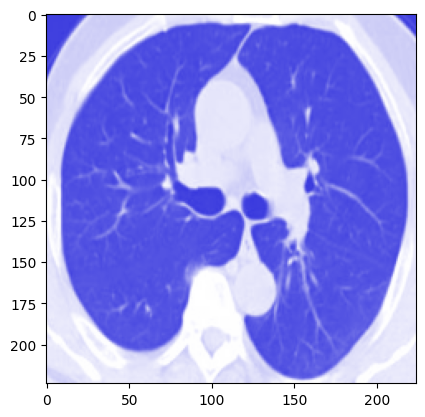

In [7]:
import random
idx = random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [8]:
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_v2_behavior()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(1,1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(1,1), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(224, 224, 3), strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', strides=(1,1), padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 112, 112, 64)      256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     1

Train on 1195 samples, validate on 299 samples
Epoch 1/75
1195/1195 [==============================] - ETA: 0s - loss: 1.3888 - precision_metric: 0.8098 - recall_metric: 0.7240

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


1195/1195 [==============================] - 172s 144ms/sample - loss: 1.3888 - precision_metric: 0.8098 - recall_metric: 0.7240 - val_loss: 161.5995 - val_precision_metric: 0.5024 - val_recall_metric: 1.0000
Epoch 2/75
1195/1195 [==============================] - 171s 143ms/sample - loss: 0.4095 - precision_metric: 0.8650 - recall_metric: 0.8177 - val_loss: 3.2623 - val_precision_metric: 0.5055 - val_recall_metric: 1.0000
Epoch 3/75
1195/1195 [==============================] - 171s 143ms/sample - loss: 0.3064 - precision_metric: 0.9098 - recall_metric: 0.8510 - val_loss: 10.4486 - val_precision_metric: 0.5116 - val_recall_metric: 1.0000
Epoch 4/75
1195/1195 [==============================] - 171s 143ms/sample - loss: 0.2421 - precision_metric: 0.9160 - recall_metric: 0.9017 - val_loss: 21.7342 - val_precision_metric: 0.5039 - val_recall_metric: 1.0000
Epoch 5/75
1195/1195 [==============================] - 170s 143ms/sample - loss: 0.2470 - precision_metric: 0.9168 - recall_metric: 0.

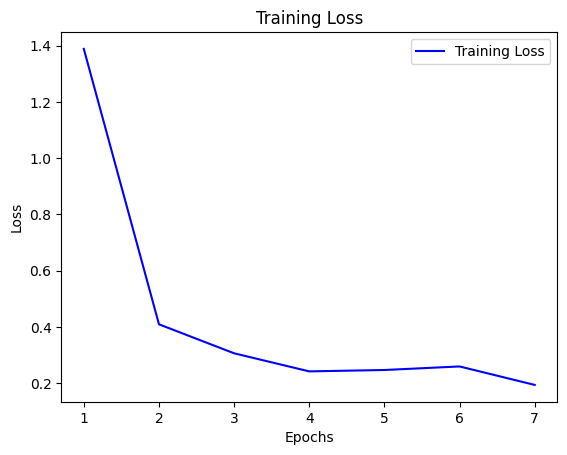

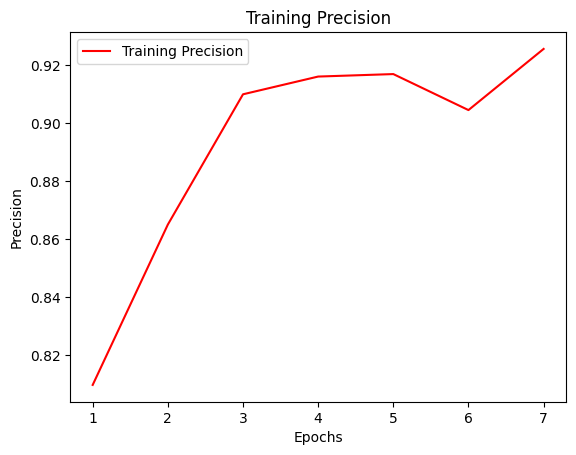

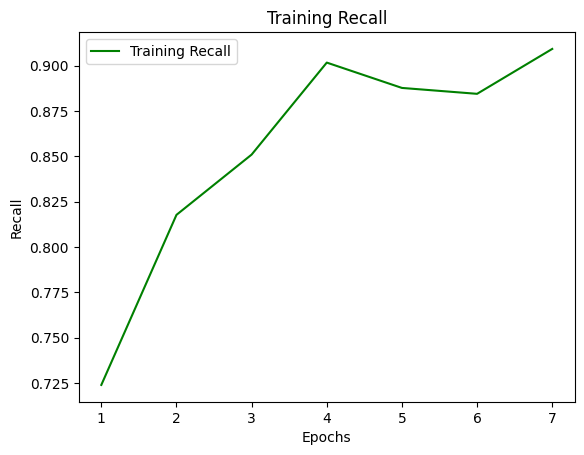

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

def precision_metric(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + tf.keras.backend.epsilon())
    return precision

def recall_metric(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compile the model with precision and recall as metrics
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=[precision_metric, recall_metric])

# Fit the model and store the training history
history = model.fit(X_train, y_train, epochs=75, batch_size=64, verbose=1, validation_split=0.2, callbacks=[early_stopping])

# Extract training loss and metrics from the history
train_loss = history.history['loss']
train_precision = history.history['precision_metric']
train_recall = history.history['recall_metric']
epochs = range(1, len(train_loss) + 1)

# Plot training loss
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training precision
plt.plot(epochs, train_precision, 'r', label='Training Precision')
plt.title('Training Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot training recall
plt.plot(epochs, train_recall, 'g', label='Training Recall')
plt.title('Training Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

Test Loss: 3.0576134749138006
Test Accuracy: 0.5119141


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Precision: 0.5095285857572718
Recall: 1.0


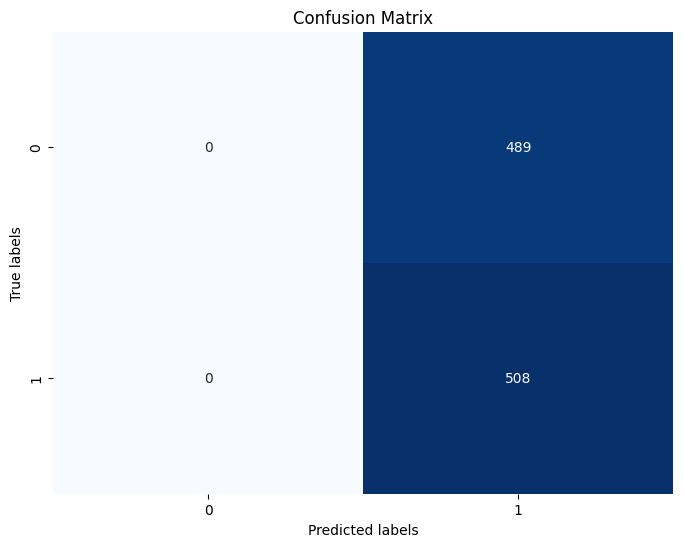

In [11]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import seaborn as sns

evaluation = model.evaluate(X_test, y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

# Get the predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Compute precision
precision = precision_score(y_test, y_pred)

# Compute recall
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

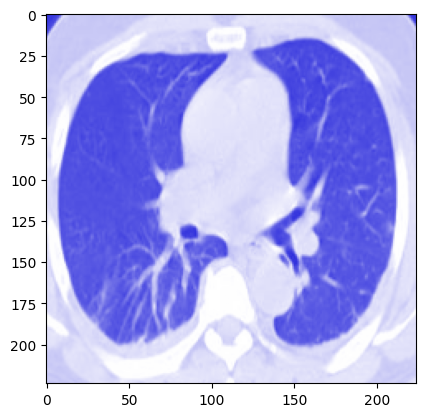

In [12]:
idx = random.randint(0,len(y_test))
plt.imshow(X_test[idx,:])
plt.show()

In [13]:
y_pred = model.predict(X_test[idx,:].reshape(1,224,224,3))
print(y_pred)

[[0.9941076]]
